In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(42)

In [2]:
data = pd.read_csv(r'data\Mall_Customers.csv')
data.set_index("CustomerID", inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
data[['Gender']] = data[['Gender']].replace({"Male":0, "Female":1})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [5]:
gender = data.Gender.value_counts()
gender.values

array([112,  88], dtype=int64)

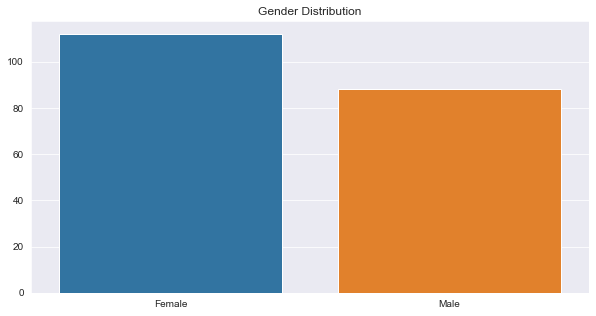

In [6]:
# EDA
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x=['Female', 'Male'],y=gender.values , data=data)
plt.title("Gender Distribution")
plt.show()

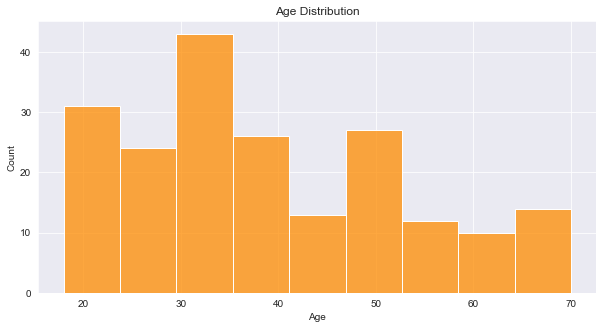

In [7]:
# EDA
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.histplot(x='Age', data=data, color='darkorange')
plt.title("Age Distribution")
plt.show()

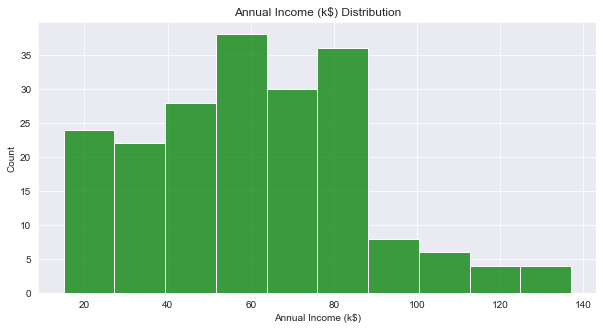

In [8]:
# EDA
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.histplot(x='Annual Income (k$)', data=data, color='green')
plt.title("Annual Income (k$) Distribution")
plt.show()

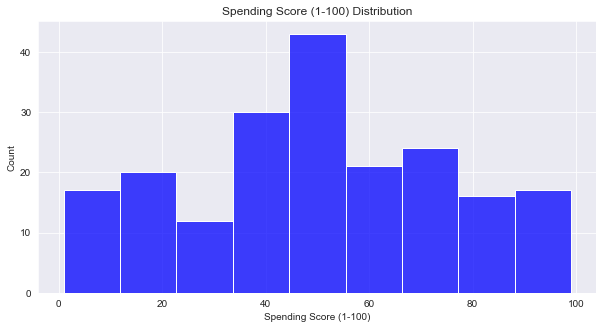

In [9]:
# EDA
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.histplot(x='Spending Score (1-100)', data=data, color='blue')
plt.title("Spending Score (1-100) Distribution")
plt.show()

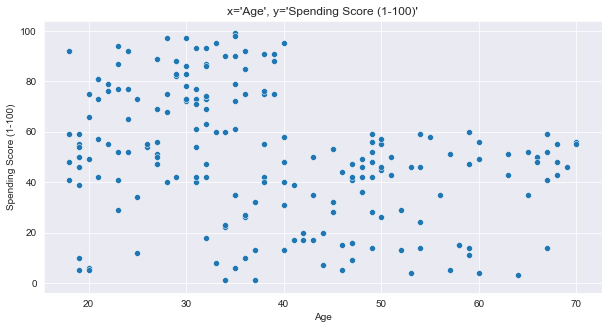

In [10]:
# EDA
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data)
plt.title("x='Age', y='Spending Score (1-100)'")
plt.show()

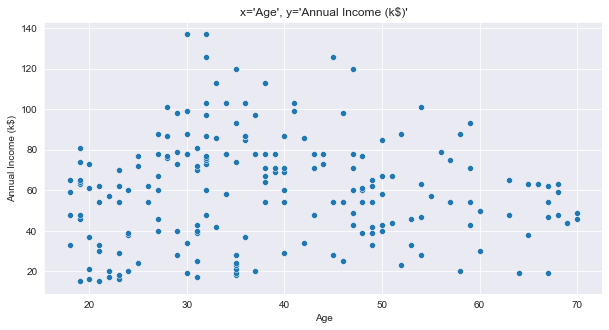

In [11]:
# EDA
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data)
plt.title("x='Age', y='Annual Income (k$)'")
plt.show()

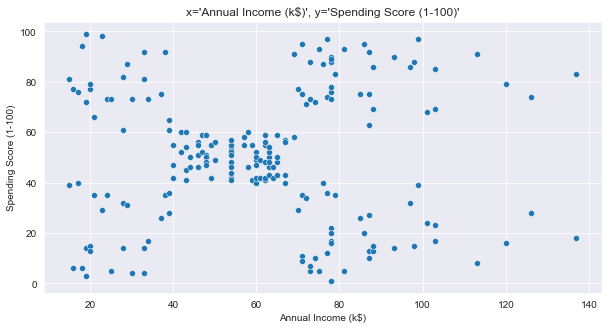

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title("x='Annual Income (k$)', y='Spending Score (1-100)'")
plt.show()

In [13]:
# Clustering
from sklearn.cluster import KMeans

model = KMeans()
data['Cluster'] = model.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Cluster'].value_counts()

1    44
6    42
2    29
3    22
0    22
4    21
5    10
7    10
Name: Cluster, dtype: int64

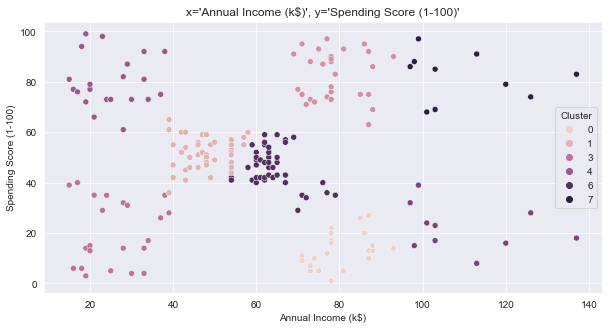

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
        data=data, hue='Cluster')
plt.title("x='Annual Income (k$)', y='Spending Score (1-100)'")
plt.show()

In [15]:
model.inertia_, model.cluster_centers_

(25011.839349156595,
 array([[ 80.18181818,  12.68181818],
        [ 47.65909091,  51.61363636],
        [ 78.55172414,  82.17241379],
        [ 25.72727273,  20.22727273],
        [ 25.0952381 ,  80.04761905],
        [109.7       ,  22.        ],
        [ 63.95238095,  46.21428571],
        [109.7       ,  82.        ]]))

In [16]:
# Finding Best No of Clusters using Elbow Method
ss = []
for k in range(3,12):
    km = KMeans(n_clusters=k)
    km.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    ss.append(km.inertia_)
    
ss

[106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30552.71402546729,
 25004.36690990053,
 21826.936303231654,
 19636.753964898155,
 17622.546838810125]

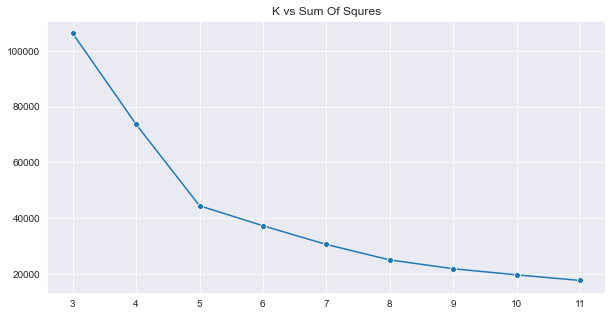

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.lineplot(x=list(range(3,12)), y=ss, marker='8')
plt.title("K vs Sum Of Squres")
plt.show()

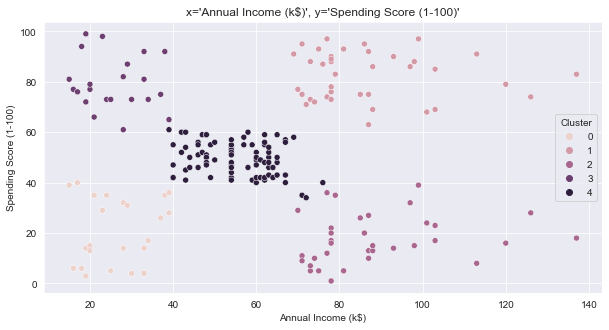

In [18]:

model5 = KMeans(n_clusters=5)
data['Cluster'] = model5.fit_predict(data[['Annual Income (k$)','Spending Score (1-100)']])

sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
        data=data, hue='Cluster')
plt.title("x='Annual Income (k$)', y='Spending Score (1-100)'")
plt.show()

In [19]:
# Validation
from sklearn.metrics import silhouette_score, silhouette_samples
silhouette_score(
    data[['Annual Income (k$)','Spending Score (1-100)']],
    data[['Cluster']].values.ravel()
)

0.553931997444648

In [20]:
silhouette_samples(
    data[['Annual Income (k$)','Spending Score (1-100)']],
    data[['Cluster']].values.ravel()
)

array([ 0.41700493,  0.69637752,  0.6399526 ,  0.6964831 ,  0.39230007,
        0.6981303 ,  0.64910316,  0.65972193,  0.63021343,  0.66350398,
        0.67788678,  0.62355268,  0.68003912,  0.71908624,  0.68070792,
        0.72573786,  0.48557434,  0.54505971,  0.58062414,  0.631684  ,
        0.46597803,  0.6774284 ,  0.64167396,  0.67170097,  0.66126882,
        0.70488566,  0.48931822,  0.30121073,  0.49570828,  0.6847372 ,
        0.60630845,  0.612474  ,  0.57697817,  0.61775968,  0.60922585,
        0.63936997,  0.58581667,  0.52897452,  0.42116018,  0.48378692,
        0.09342298,  0.54589636, -0.00927769,  0.1170758 ,  0.31116673,
        0.0507214 ,  0.38841392,  0.43312564,  0.29204034,  0.29204034,
        0.5203998 ,  0.30155503,  0.51561237,  0.34144075,  0.48988757,
        0.37332421,  0.59860522,  0.54128572,  0.63883859,  0.59367906,
        0.55806656,  0.57952023,  0.64920886,  0.50415514,  0.67809813,
        0.52881485,  0.68358333,  0.66547762,  0.52881485,  0.65

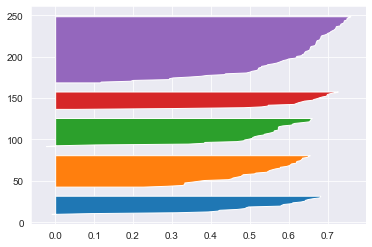

In [21]:
sscore = silhouette_score(
    data[['Annual Income (k$)','Spending Score (1-100)']],
    data[['Cluster']].values.ravel()
)
ssample = silhouette_samples(
    data[['Annual Income (k$)','Spending Score (1-100)']],
    data[['Cluster']].values.ravel()
)
ylow = 10
for c in set(model5.labels_):
    cSample = ssample[data['Cluster']==c]
    cSample.sort()
    yup = ylow + cSample.shape[0]
    plt.fill_betweenx(np.arange(ylow, yup), 0,cSample )
    ylow = yup + 10
plt.show()

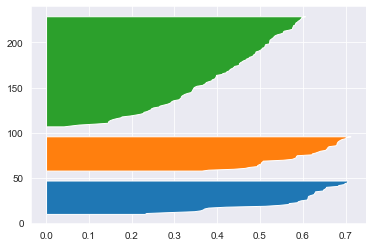

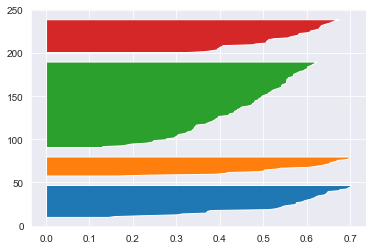

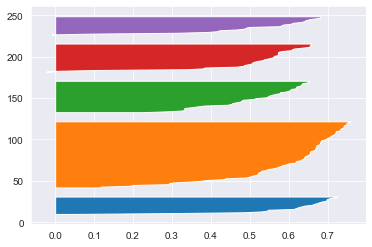

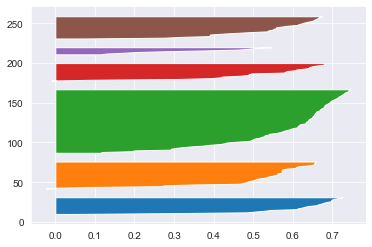

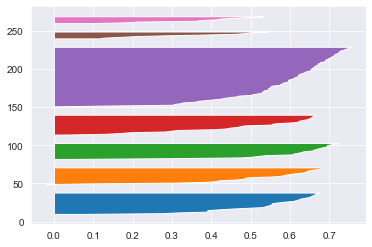

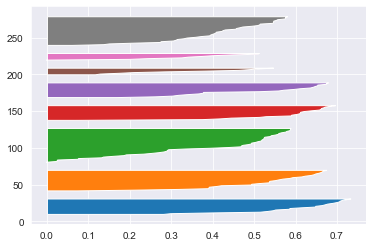

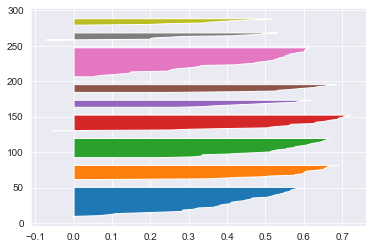

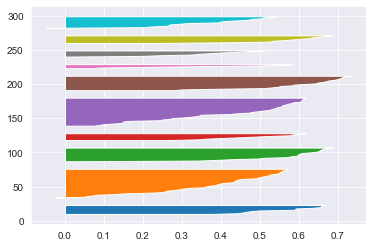

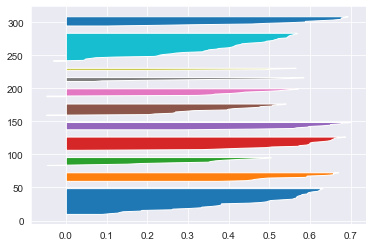

In [22]:
for k in range(3, 12):
    km = KMeans(n_clusters=k)
    data['Cluster'] = km.fit_predict(
        data[['Annual Income (k$)','Spending Score (1-100)']])

    sscore = silhouette_score(
        data[['Annual Income (k$)', 'Spending Score (1-100)']],
        data[['Cluster']].values.ravel()
    )
    ssample = silhouette_samples(
        data[['Annual Income (k$)', 'Spending Score (1-100)']],
        data[['Cluster']].values.ravel()
    )
    ylow = 10
    for c in set(km.labels_):
        cSample = ssample[data['Cluster'] == c]
        cSample.sort()
        yup = ylow + cSample.shape[0]
        plt.fill_betweenx(np.arange(ylow, yup), 0, cSample)
        ylow = yup + 10
    plt.show()
